# Demonstration of `opticalpy`

*Developed by [Aurélien Genin](https://github.com/AstroAure/Opticalpy)*

In [ ]:
% pip install --upgrade opticalpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.units import nm, deg
from importlib.metadata import version
import opticalpy as op
print(f"opticalpy : {version('opticalpy')}")

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
# %matplotlib ipympl

opticalpy : 1.0.1


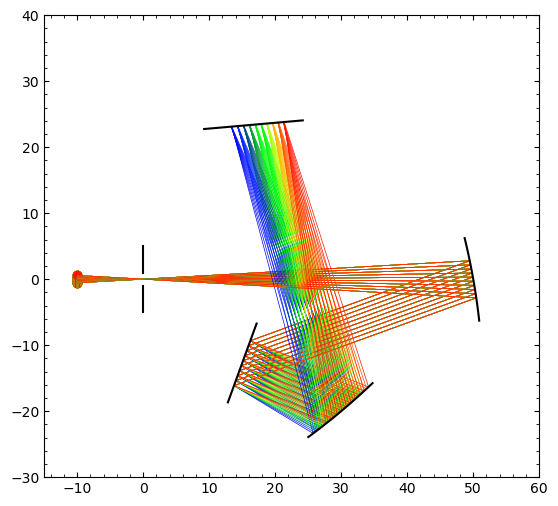

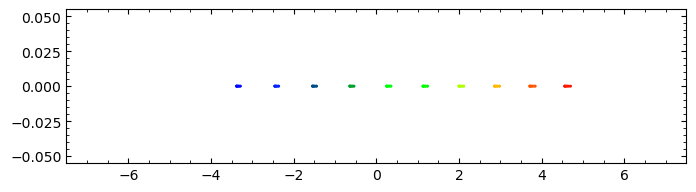

In [2]:
# Czerny-Turner Spectrograph
scene = op.Scene(xlim=(-15,60), ylim=(-30,40))

slit_width = 2
slit_size = 10
primary_f    = 50
primary_aper = 12.7
second_f     = primary_f
second_aper  = primary_aper

spectrograph = op.OpticalGroup(scene=scene, origin=[0,0], rotation=0, label="Spectrograph")
slit = op.elems.Slit(full_size=slit_size, slit_width=slit_width, group=spectrograph, origin=[0,0], rotation=90, label="Slit")
primary = op.elems.ParabolicMirror(focal=primary_f, aperture=primary_aper, group=spectrograph, origin=[primary_f,0], rotation=100, label="Primary")
secondary = op.elems.ParabolicMirror(focal=second_f, aperture=second_aper, group=spectrograph, origin=[30,-20], rotation=40, label="Secondary")
grating = op.elems.Grating(aperture=primary_aper, period=1000, order=1, group=spectrograph, origin=[15,-12.7], rotation=70, label="Grating")
camera = op.visualization.Camera(aperture=15, group=spectrograph, origin=[16.7,23.4], rotation=5, label="Camera")

beam = op.elems.ConvergingBeam(N_sources=10, focal=10, F=8.9, wavelength=np.linspace(450,620,10), scene=scene, origin=[-10,0], rotation=0, label="Beam")

scene.plot(show_hitbox=False)
camera.plot()

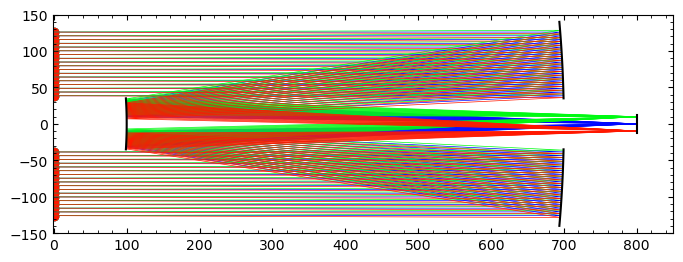

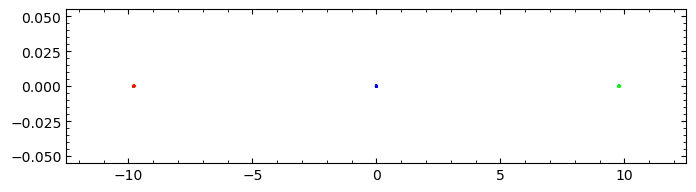

In [3]:
# Cassegrain telescope
scene = op.Scene(xlim=(-1,850), ylim=(-150,150), lifetime=2000)
# scene = op.Scene(xlim=(775,805), ylim=(-15,15), lifetime=2000)

cassegrain, geom = op.elems.CassegrainTelescope(focal=2800, aperture=280, backfocus=100, length=600, scene=scene, origin=[800,0], rotation=180, return_geometry=True)

camera = op.visualization.Camera(25, scene=scene, origin=[800,0], rotation=90)

beam = op.elems.CollimatedBeam(aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])
beam = op.elems.CollimatedBeam(wavelength=520, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])
beam = op.elems.CollimatedBeam(wavelength=620, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])

scene.plot()
camera.plot()

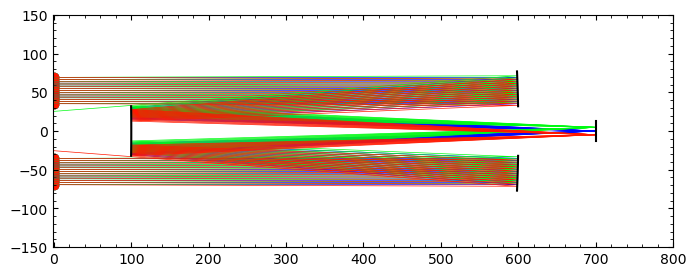

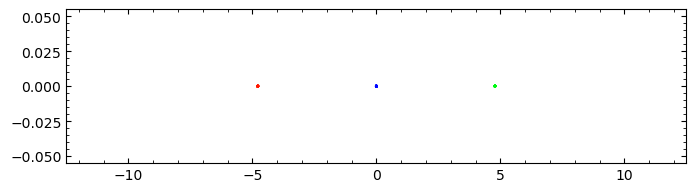

In [4]:
# Ritchey-Chretien telescope
scene = op.Scene(xlim=(-1,800), ylim=(-150,150), lifetime=2000)
# scene = rt.Scene(xlim=(675,705), ylim=(-15,15), lifetime=2000)

ritchey_chretien, geom = op.elems.RitcheyChretienTelescope(focal=1370, aperture=154, backfocus=100, length=500, scene=scene, origin=[700,0], rotation=180, return_geometry=True)

camera = op.visualization.Camera(25, scene=scene, origin=[700,0], rotation=90)

beam = op.elems.CollimatedBeam(aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])
beam = op.elems.CollimatedBeam(wavelength=520, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])
beam = op.elems.CollimatedBeam(wavelength=620, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])

scene.plot()
camera.plot()

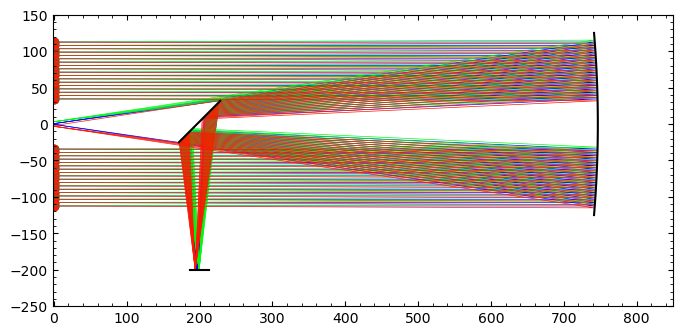

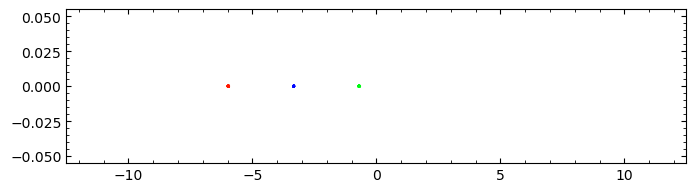

In [5]:
# Newtonian telescope (WIP)
scene = op.Scene(xlim=(-1,850), ylim=(-250,150), lifetime=2000)
# scene = op.Scene(xlim=(-8,-2), ylim=(-197,-180), lifetime=2000)

focal = 750
aperture = 250
aperture2 = 80
offset = (aperture*aperture2/focal)/8
# offset=0

newtonian = op.OpticalGroup(scene=scene, origin=[200,0], rotation=180, label="Newtonian")
primary = op.elems.ParabolicMirror(focal=focal, aperture=aperture, group=newtonian, origin=[-550+offset,0], rotation=-90, label="Primary")
# primary = op.elems.SphericalMirror(radius=1504.5, aperture=250, group=newtonian, origin=[550,0], rotation=90, label="Primary")
secondary = op.elems.FlatMirror(aperture=aperture2, group=newtonian, origin=[0,-offset], rotation=45, label="Secondary")

camera = op.visualization.Camera(aperture=25, scene=scene, origin=[200,-200], rotation=0, label="Camera")

geom = {'Primary':{'Diameter':aperture}, 'Secondary':{'Diameter':aperture2}}
beam = op.elems.CollimatedBeam(aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=0.8*geom['Secondary']['Diameter'])
beam = op.elems.CollimatedBeam(wavelength=520, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=0.8*geom['Secondary']['Diameter'])
beam = op.elems.CollimatedBeam(wavelength=620, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=0.8*geom['Secondary']['Diameter'])

scene.plot()
camera.plot()

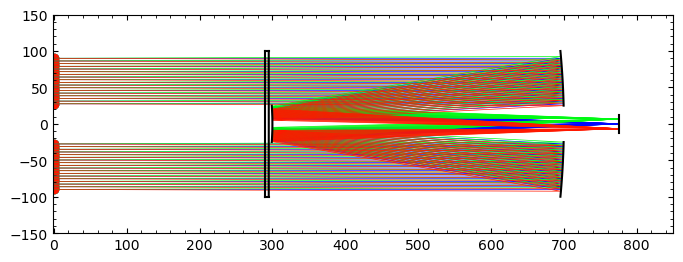

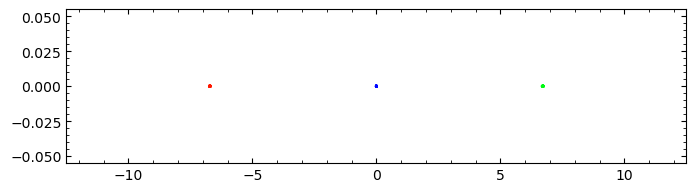

In [7]:
# Schmidt-Cassegrain (WIP)
scene = op.Scene(xlim=(-1,850), ylim=(-150,150), lifetime=2000)
# scene = op.Scene(xlim=(776,777), ylim=(-1,1), lifetime=2000)

length = 400
backfocus = 100
focal = 2000
aperture = 200
origin = [800,0]
rotation = 180
label = "Schmidt-Cassegrain"

q = length+backfocus
M = (focal-q)/(q-backfocus)
f1 = focal/M
p = (f1+backfocus)/(M+1)
aperture2 = aperture*p/f1
r2 = 2*q/(M-1)
b = -(4*M)/(M-1)**2 -1
telescope = op.OpticalGroup(scene=scene, origin=origin, rotation=rotation, label=label)
primary = op.elems.SphericalMirrorHole(radius=2*f1, aperture=aperture, hole=aperture2, group=telescope, origin=[backfocus,0], rotation=-90)
secondary = op.elems.HyperbolicMirror(radius=r2, aperture=aperture2, b=b, group=telescope, origin=[q,0], rotation=-90)
corrector = op.elems.SchmidtCorrector(aperture=aperture, radius=2*f1, n=1.4, width=5, group=telescope, origin=[q+10,0], rotation=-90)

camera = op.visualization.Camera(25, scene=scene, origin=[776.28,0], rotation=90)

beam = op.elems.CollimatedBeam(aperture=0.9*aperture, scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=1.1*aperture2)
beam = op.elems.CollimatedBeam(wavelength=520, aperture=0.9*aperture, scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=1.1*aperture2)
beam = op.elems.CollimatedBeam(wavelength=620, aperture=0.9*aperture, scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=1.1*aperture2)

scene.plot()
camera.plot()

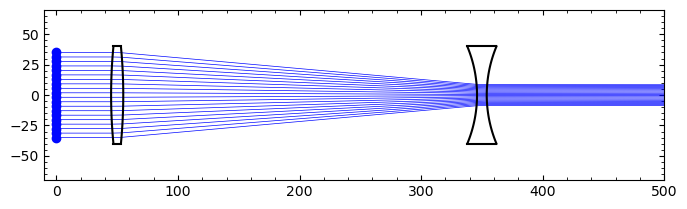

In [8]:
# Lens
scene = op.Scene(xlim=(-10,500), ylim=(-70,70))

primary_f = 400
secondary_f = -100

primary = op.elems.ThinSymmetricalLens(focal=primary_f, aperture=80, n=op.elems.n_BK7, width=10,
                                 scene=scene, origin=[50,0], rotation=90)
secondary = op.elems.ThinSymmetricalLens(focal=secondary_f, aperture=80, n=op.elems.n_BK7, width=5,
                                   scene=scene, origin=[50+primary_f+secondary_f,0], rotation=90)

beam = op.elems.CollimatedBeam(aperture=70, N_sources=20, scene=scene, origin=[0,0], rotation=0)

scene.plot(show_hitbox=False)

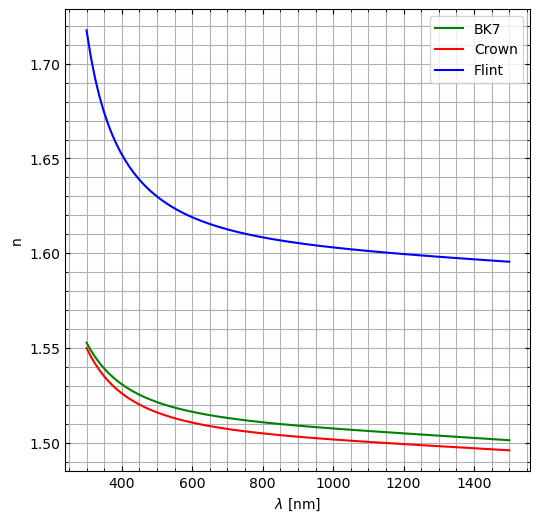

In [9]:
# Index of refraction
wavelengths = np.linspace(300,1500,100)*nm
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(wavelengths, op.elems.n_BK7(wavelengths), color='g', label="BK7")
ax.plot(wavelengths, op.elems.n_Crown(wavelengths), color='r', label="Crown")
ax.plot(wavelengths, op.elems.n_Flint(wavelengths), color='b', label="Flint")
ax.set_xlabel("$\lambda$ [nm]")
ax.set_ylabel("n")
ax.grid(visible=True, which='both')
ax.legend()
plt.show()

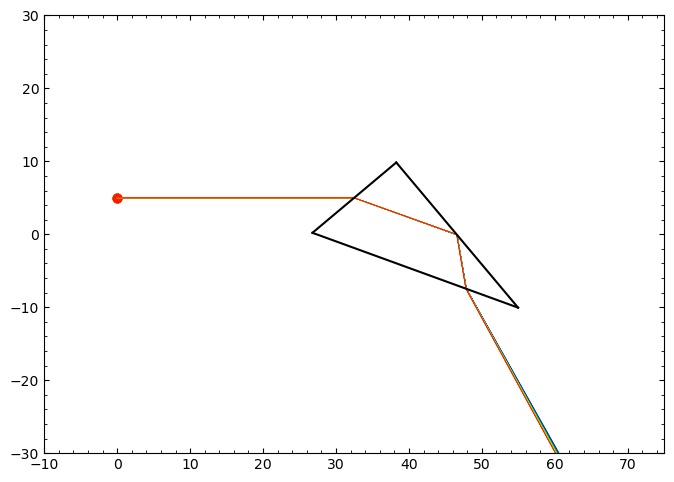

In [10]:
# Prism
scene = op.Scene(xlim=(-10,75), ylim=(-30,30))

prism = op.elems.Prism(size=30, n=op.elems.n_BK7, angles=[60,30], scene=scene, origin=[40,0], rotation=-20)

white_ray = op.elems.WhiteRay(wavelengths=np.linspace(450,620,20), scene=scene, origin=[0,5], rotation=0)

scene.plot(show_hitbox=False)

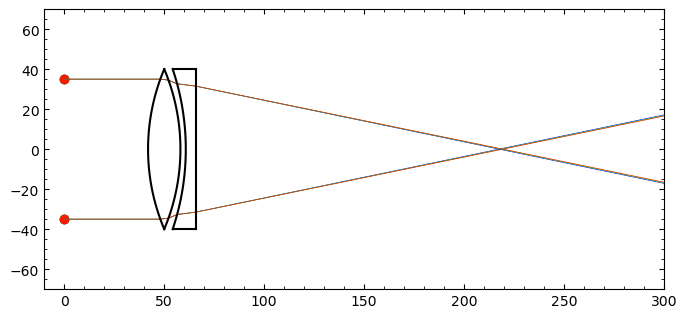

In [11]:
# Achromatic lens (WIP)
scene = op.Scene(xlim=(-10,300), ylim=(-70,70))

focal = 100

primary = op.elems.ThinSymmetricalLens(focal=focal, aperture=80, n=op.elems.n_Crown, width=10, scene=scene, origin=[50,0], rotation=90)
secondary = op.elems.ThinBackFlatLens(focal=-2*focal, aperture=80, n=op.elems.n_Flint, width=5, scene=scene, origin=[60,0], rotation=90)

beam = op.elems.CollimatedBeam(aperture=70, N_sources=2, wavelength=np.linspace(450,620,3), scene=scene, origin=[0,0], rotation=0)

scene.plot(show_hitbox=False)